In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [2]:
#Part 1#

In [15]:
#Loading diabetes data#
from sklearn import datasets
df = datasets.load_diabetes()

In [16]:
X = df.data
y = df.target

In [20]:
y = np.reshape(y,(y.shape[0],1))

In [22]:
df_1 = np.hstack((X,y))

In [23]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df_1)

In [24]:
#Splitting data into training and testing datasets#
X_train, X_test, y_train, y_test = train_test_split(df[:,:-1], df[:,-1], test_size = 0.30)

In [25]:
### Code for metrics calculation
def metrica(model , X_train , y_train , X_test , y_test,p,lambda_= None):
    regressor = model(lambda_)                #Initializing Model
    regressor.fit(X_train,y_train)            #Fitting Model
    prediction = regressor.predict(X_test)    # Predicting Model

    # Calculating metrics RMSE and R^2

    rmse =  metrics.mean_squared_error(y_test,prediction,squared=False)
    r2 = metrics.r2_score(y_test,prediction)

    if p == True:
        return print( "RMSE is " + str(rmse) + " and R^2 is " + str(r2) )
    else:
        return np.array([rmse , r2])

In [26]:
#Part 2#

Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
metrica(Lasso,X_train,y_train,X_test,y_test,p = True,lambda_= 0.1)

RMSE is 0.73486187307788 and R^2 is 0.4894706695617842


Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
metrica(Ridge,X_train,y_train,X_test,y_test,p = True,lambda_ = 1.0)

RMSE is 0.6740079404847066 and R^2 is 0.5705236109905075


MLR

In [29]:
from sklearn.linear_model import LinearRegression
metrica(LinearRegression,X_train,y_train,X_test,y_test,p = True)

RMSE is 0.6637392269157301 and R^2 is 0.5835103271032706


KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor
metrica(KNeighborsRegressor,X_train,y_train,X_test,y_test,p = True,lambda_=6)

RMSE is 0.779286235795481 and R^2 is 0.4258792043231203


In [31]:
#Part 3#

Cross Validation

In [32]:
class cv:
    def __init__(self,model,data,k_fold,lambda_=None):
        self.model = model
        self.X  = data[:,:-1]
        self.y  = data[:,-1]
        self.k_fold  = k_fold
        self.lambda_ = lambda_

    def compute(self):
        kf = KFold(n_splits=self.k_fold)
        regressor = self.model(self.lambda_)
        a = np.empty(self.k_fold,dtype=np.float64)
        b = np.empty(self.k_fold,dtype=np.float64)
        count = -1
        for train_index, test_index in kf.split(self.X):
            count = count +1
            X_train, X_test = self.X[train_index], self.X[test_index]
            y_train, y_test = self.y[train_index], self.y[test_index]
            regressor.fit(X_train,y_train)
            prediction = regressor.predict(X_test)
            rmse_ =  metrics.mean_squared_error(y_test,prediction,squared=False)
            r2_ = metrics.r2_score(y_test,prediction)
            a[count]=rmse_
            b[count]=r2_
        self.rmse = a
        self.r2 = b
        return self

Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
cross_valid_lasso = cv(Lasso,df,6,0.11)
cross_valid_lasso.compute();

In [34]:
print("Mean of RMSE is "+ str(cross_valid_lasso.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_lasso.r2.mean()))

Mean of RMSE is 0.7343550481244928
Mean of R^2 is 0.4483233250117606


Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
cross_valid_ridge = cv(Ridge,df,6,0.11)
cross_valid_ridge.compute();

In [36]:
print("Mean of RMSE is "+ str(cross_valid_ridge.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_ridge.r2.mean()))

Mean of RMSE is 0.7122450577602372
Mean of R^2 is 0.479790858411335


MLR

In [37]:
from sklearn.linear_model import LinearRegression
cross_valid_MLR = cv(LinearRegression,df,6)
cross_valid_MLR.compute();

In [38]:
print("Mean of RMSE is "+ str(cross_valid_MLR.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_MLR.r2.mean()))

Mean of RMSE is 0.7109658296917613
Mean of R^2 is 0.4816852607318783


KNN

In [39]:
from sklearn.neighbors import KNeighborsRegressor
cross_valid_knn = cv(KNeighborsRegressor,df,6,9)
cross_valid_knn.compute();

In [40]:
print("Mean of RMSE is "+ str(cross_valid_knn.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_knn.r2.mean()))

Mean of RMSE is 0.7561451229305206
Mean of R^2 is 0.41663741763080653


In [41]:
#Part 4#

Presence of outliers

In [47]:
#Loading diabetes data once again#
from sklearn import datasets
df_1 = datasets.load_diabetes()

In [52]:
X_1 = df_1.data
y_1 = df_1.target

In [53]:
#creating dataframe from data
datframe = pd.DataFrame(X_1, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
#showing head
datframe.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [54]:
datframe["targ"] = y_1

In [55]:
datframe.shape

(442, 11)

In [57]:
datframe.isnull().sum()

age     0
sex     0
bmi     0
bp      0
tc      0
ldl     0
hdl     0
tch     0
ltg     0
glu     0
targ    0
dtype: int64

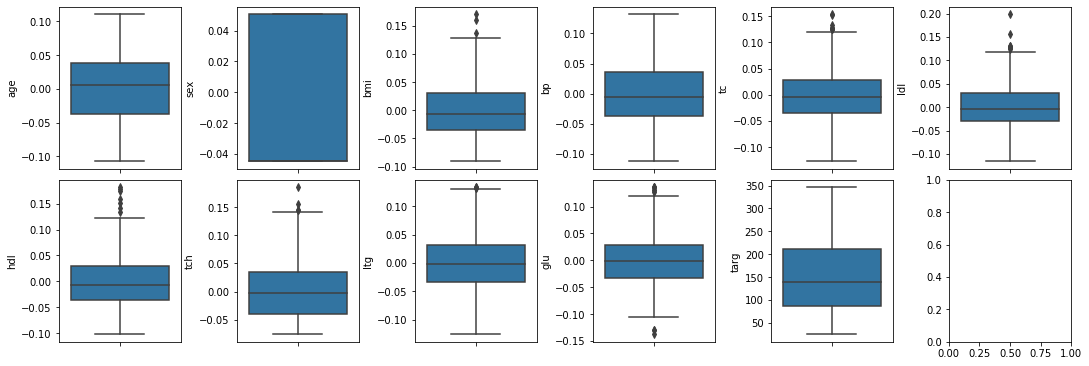

In [56]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in datframe.columns:
  sns.boxplot(y=i, data=datframe, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [58]:
#checking percentage and amount of outliers
for i in datframe.columns:
  datframe.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(datframe[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = datframe[i][(datframe[i] < lower_bound) | (datframe[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/datframe[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in age is 0.00% with count 0
Outliers in sex is 0.00% with count 0
Outliers in bmi is 0.68% with count 3
Outliers in bp is 0.00% with count 0
Outliers in tc is 1.81% with count 8
Outliers in ldl is 1.58% with count 7
Outliers in hdl is 1.58% with count 7
Outliers in tch is 0.90% with count 4
Outliers in ltg is 0.90% with count 4
Outliers in glu is 2.04% with count 9
Outliers in targ is 0.00% with count 0
